<a href="https://colab.research.google.com/github/NanamyYu/photo_algo/blob/main/example_to_read_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
main_folder = "/content/drive/MyDrive/Colab_Notebooks/CCV/"

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Example

In [ ]:
gt = np.load(main_folder + "data_example/output_generated_data/2019-08-25_006_gt.npy", allow_pickle=True)

In [ ]:
# gt keys:
# image
# cmfs

gt_xyz  = gt.item().get('xyz')
gt_cmfs = gt.item().get('cmfs')

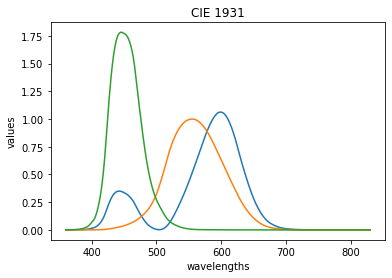

In [ ]:
# view cmfs

plt.plot(gt_cmfs["wavelengths"], gt_cmfs["values"])
plt.title("CIE 1931")
plt.xlabel("wavelengths")
plt.ylabel("values")
plt.show()

In [8]:
from utils.XYZ_to_SRGB import XYZ_TO_SRGB

In [9]:
SRGB = XYZ_TO_SRGB()

In [10]:
sRGB_img = SRGB.XYZ_to_sRGB(gt_xyz)

NameError: ignored

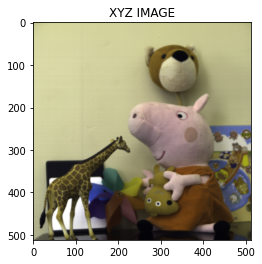

In [ ]:
plt.imshow(gt_xyz)
plt.title("XYZ IMAGE")
plt.show()

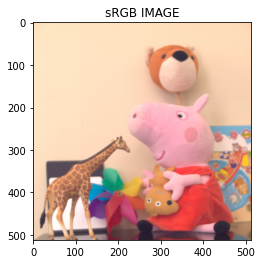

In [ ]:
plt.imshow(sRGB_img)
plt.title("sRGB IMAGE")
plt.show()

In [ ]:
sample = np.load("./data_example/output_generated_data/2019-08-25_006_sample.npy", allow_pickle=True)

In [ ]:
# sample keys:
# image
# cmfs
# light
# bayer
# mean
# sigma

sample_img   = sample.item().get('image')
sample_cmfs  = sample.item().get('cmfs')
sample_light = sample.item().get('light')
sample_bayer = sample.item().get('bayer')
sample_mean  = sample.item().get('mean')
sample_sigma = sample.item().get('sigma')

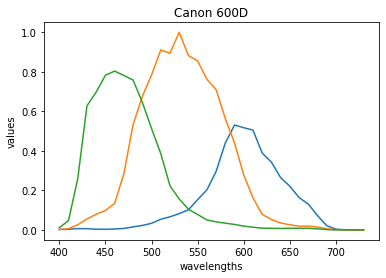

In [ ]:
# view cmfs

plt.plot(sample_cmfs["wavelengths"], sample_cmfs["values"])
plt.title("Canon 600D")
plt.xlabel("wavelengths")
plt.ylabel("values")
plt.show()

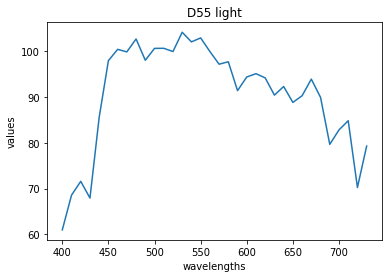

In [ ]:
# view light
key = list(sample_light.keys())[0]
plt.plot(sample_cmfs["wavelengths"], np.array(sample_light[key]))
plt.title(f"{key} light")
plt.xlabel("wavelengths")
plt.ylabel("values")
plt.show()

In [ ]:
print("Bayer:", sample_bayer, "Noise mean:", sample_mean, "Noise sigma:", sample_sigma)

Bayer: GRBG Noise mean: 0 Noise sigma: [8]


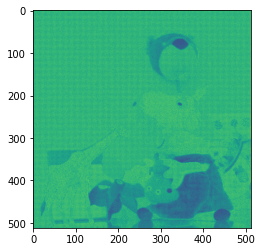

In [ ]:
plt.imshow(sample_img)

# *other*

In [11]:
!pip install colour-science

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from utils.XYZ_to_SRGB import XYZ_TO_SRGB

In [5]:
import tarfile

with tarfile.open(main_folder + "data/output_generated_data.tar") as tar:
    tar.extractall()

In [37]:
gt1 = np.load("/content/drive/MyDrive/Colab_Notebooks/CCV/data_example/output_generated_data/2019-08-25_006_gt.npy", allow_pickle=True)

In [38]:
gt_xyz  = gt1.item().get('xyz')
gt_cmfs = gt1.item().get('cmfs')

In [43]:
SRGB = XYZ_TO_SRGB()

In [214]:
sRGB_img = SRGB.XYZ_to_sRGB(gt_xyz)

/content/utils/XYZ_to_SRGB.py:27: UserWarning: ffs, use float32 not float64
  warnings.warn("ffs, use float32 not %s" % img.dtype)
/content/utils/XYZ_to_SRGB.py:29: UserWarning: ffs, the range should be in [0, 1] not [-0.066235 25.850396]
  warnings.warn(


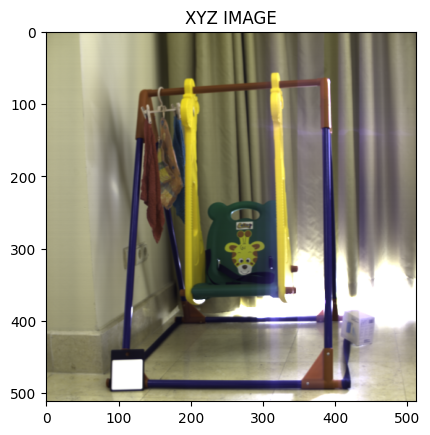

In [215]:
plt.imshow(gt_xyz)
plt.title("XYZ IMAGE")
plt.show()

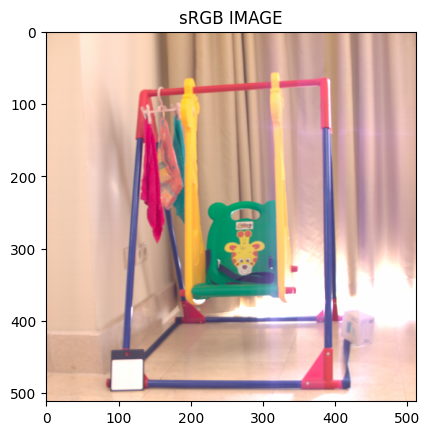

In [216]:
plt.imshow(sRGB_img)
plt.title("sRGB IMAGE")
plt.show()

In [6]:
sample1 = np.load("sample.npy", allow_pickle=True)

In [30]:
sample2 = np.load("/content/drive/MyDrive/Colab_Notebooks/CCV/data_example/output_generated_data/2019-08-25_006_sample.npy", allow_pickle=True)

In [31]:
# sample keys:
# image
# cmfs
# light
# bayer
# mean
# sigma

sample_img2   = sample2.item().get('image')


In [7]:
# sample keys:
# image
# cmfs
# light
# bayer
# mean
# sigma

sample_img   = sample1.item().get('image')
sample_cmfs  = sample1.item().get('cmfs')
sample_light = sample1.item().get('light')
sample_bayer = sample1.item().get('bayer')
sample_mean  = sample1.item().get('mean')
sample_sigma = sample1.item().get('sigma')

In [219]:
print("Bayer:", sample_bayer, "Noise mean:", sample_mean, "Noise sigma:", sample_sigma)

Bayer: GRBG Noise mean: 0 Noise sigma: [12]


In [225]:
sample_img

array([[231, 118, 231, ...,  79, 128,  89],
       [107, 227, 108, ..., 141,  57, 156],
       [235, 133, 252, ...,  73, 130,  63],
       ..., 
       [ 82, 219,  92, ..., 196,  93, 200],
       [183, 109, 203, ...,  98, 183, 123],
       [ 72, 197, 109, ..., 169,  92, 186]], dtype=uint16)

In [8]:
tsample_img = sample_img / np.max(sample_img)

In [32]:
tsample_img2 = sample_img2 / np.max(sample_img2)


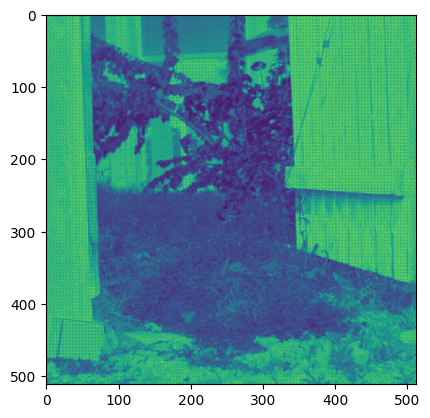

In [9]:
plt.imshow(tsample_img)

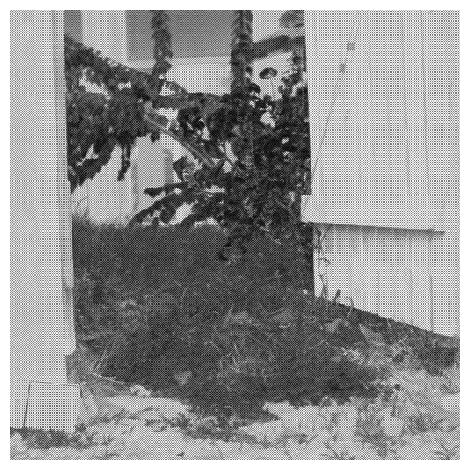

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [12]:
import colour
colour.plotting.plot_image(tsample_img)

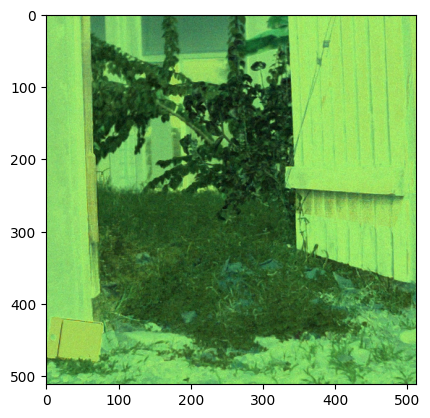

In [33]:

from debayering import menon
rgb = menon.bayer2rgb(tsample_img, pattern="GRBG")
rgb2 = menon.bayer2rgb(tsample_img2, pattern="GRBG")
# colour.plotting.plot_image(colour.cctf_encoding(rgb))
plt.imshow(rgb)

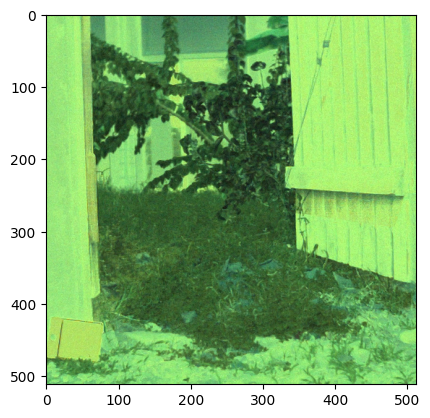

In [14]:
trgb = rgb + abs(np.min(rgb))
trgb /= np.max(rgb)
plt.imshow(trgb)

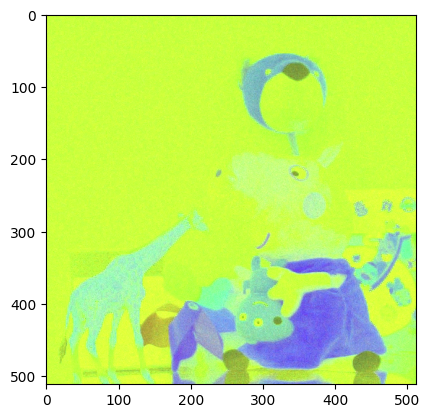

In [34]:
trgb2 = rgb2 + abs(np.min(rgb2))
trgb2 /= np.max(rgb2)
plt.imshow(trgb2)

# Denoising

In [18]:
!pip install bm3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.5 MB/s eta 0:00:00


In [19]:
import bm3d
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
import plotly as px
import random
from torch.utils.data import DataLoader, Dataset, random_split

In [20]:
def psnr(target, ref, max_value=255.0):
    # Если входные данные - это тензоры PyTorch, преобразуем их в массивы NumPy
    if isinstance(target, torch.Tensor):
        target = target.cpu().detach().numpy()
    if isinstance(ref, torch.Tensor):
        ref = ref.cpu().detach().numpy()

    # Вычисляем среднеквадратическую ошибку
    mse = np.mean((target - ref) ** 2)

    # Вычисляем PSNR
    if mse == 0:
        return float("inf")
    else:
        return 10 * np.log10((max_value ** 2) / mse)

In [21]:
def plot_images(images, titles=None, rows=1, figsize=(5, 5)):
    fig, axs = plt.subplots(rows, len(images)//rows, figsize=figsize)
    axs = axs.ravel()
    for i, image in enumerate(images):
        axs[i].imshow(image, cmap='gray')
        axs[i].axis('off')
        if titles is not None:
            axs[i].set_title(titles[i])
    plt.tight_layout()
    plt.show()

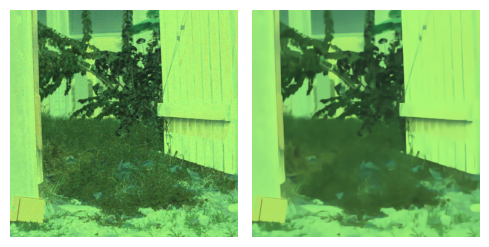

In [24]:
bm3d_img = bm3d.bm3d(trgb, sigma_psd=[0.1], stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
# Преобразуем изображения в тензоры PyTorch
noisy_img_tensor = torch.from_numpy(trgb.transpose((2, 0, 1))).float().unsqueeze(0)
clean_img_tensor = torch.from_numpy(trgb.transpose((2, 0, 1))).float().unsqueeze(0)
bm3d_img_tensor  = torch.from_numpy(bm3d_img.transpose((2, 0, 1))).float().unsqueeze(0)


# # Вычисляем PSNR
# psnr_value = psnr(noisy_img_tensor, clean_img_tensor)
# # # Вычисляем SSIM
# ssim_value =  ssim(noisy_img_tensor, clean_img_tensor, data_range=255)
# ssim_value_bm3d = ssim(bm3d_img_tensor, clean_img_tensor, data_range=255)

# print(f"PSNR: {psnr_value:.2f}, {psnr_value_bm3d:.2f}")
# print(f"SSIM: {ssim_value:.2f}, {ssim_value_bm3d:.2f}")


plot_images([trgb, bm3d_img])

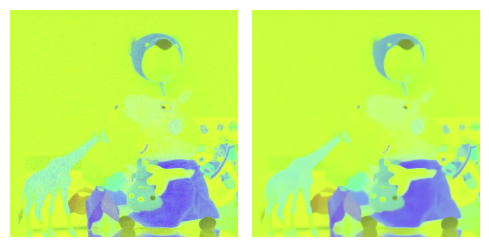

In [35]:
bm3d_img2 = bm3d.bm3d(trgb2, sigma_psd=[0.1], stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
# Преобразуем изображения в тензоры PyTorch
# noisy_img_tensor = torch.from_numpy(trgb.transpose((2, 0, 1))).float().unsqueeze(0)
# bm3d_img_tensor  = torch.from_numpy(bm3d_img.transpose((2, 0, 1))).float().unsqueeze(0)


# # Вычисляем PSNR
# psnr_value = psnr(noisy_img_tensor, clean_img_tensor)
# # # Вычисляем SSIM
# ssim_value =  ssim(noisy_img_tensor, clean_img_tensor, data_range=255)
# ssim_value_bm3d = ssim(bm3d_img_tensor, clean_img_tensor, data_range=255)

# print(f"PSNR: {psnr_value:.2f}, {psnr_value_bm3d:.2f}")
# print(f"SSIM: {ssim_value:.2f}, {ssim_value_bm3d:.2f}")


plot_images([trgb2, bm3d_img2])

# Third step

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.linear_model import LinearRegression 
from utils.XYZ_to_SRGB import XYZ_TO_SRGB

from utils.utils import RootPolynomialFeatures, RobustScalableRationalFeatures
from sklearn.preprocessing import PolynomialFeatures

In [26]:
bm3d_img /= np.max(bm3d_img)

In [36]:
bm3d_img2 /= np.max(bm3d_img2)

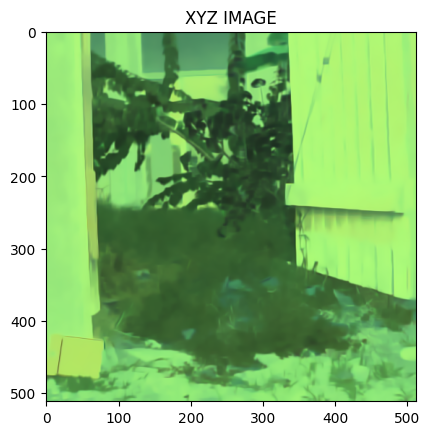

In [27]:
plt.imshow(bm3d_img)
plt.title("XYZ IMAGE")
plt.show()

In [39]:
linear_regres = LinearRegression(fit_intercept=False)
linear_regres = linear_regres.fit(bm3d_img2.reshape(-1, 3), gt_xyz.reshape(-1, 3))

In [40]:
test = linear_regres.predict(bm3d_img.reshape(-1, 3)).reshape(512, 512, 3)

/content/utils/XYZ_to_SRGB.py:27: UserWarning: ffs, use float32 not float64
  warnings.warn("ffs, use float32 not %s" % img.dtype)
/content/utils/XYZ_to_SRGB.py:29: UserWarning: ffs, the range should be in [0, 1] not [-0.083582 0.914100]
  warnings.warn(


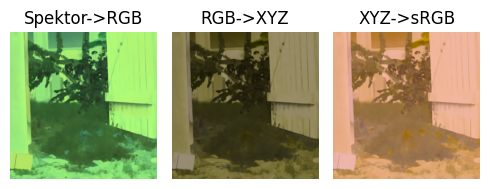

In [44]:
plot_images([bm3d_img, test, SRGB.XYZ_to_sRGB(test)],
            ['Spektor->RGB','RGB->XYZ', 'XYZ->sRGB'])

# Score

In [192]:
def mse(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    return mse

def stress(img1, img2):
    img1_1 = np.sum(np.square(img1))
    img2_2 = np.sum(np.square(img2))
    img1_2 = np.sum(img1 * img2)
    
    return (np.sqrt(1 - np.square(img1_2) / (img1_1 * img2_2)))


def calculate_angle_between_images(image1_xyz, image2_xyz):
    """
    Функция для вычисления углов между двумя XYZ изображениями.

    :param image1_xyz: массив с координатами точек на первом изображении в XYZ формате.
    :param image2_xyz: массив с координатами точек на втором изображении в XYZ формате.
    :return: массив с углами между точками на двух изображениях в градусах.
    """

    # Вычисляем количество точек на изображениях
    num_points = min(len(image1_xyz), len(image2_xyz))

    # Инициализируем массив для хранения углов между точками на двух изображениях
    angles = np.zeros(num_points)

    # Проходим по всем точкам на изображениях
    for i in range(num_points):
        # Извлекаем координаты i-й точки на двух изображениях
        x1, y1, z1 = image1_xyz[i][i]
        x2, y2, z2 = image2_xyz[i][i]

        # Вычисляем вектор между соответствующими точками на двух изображениях
        vec1 = np.array([x1, y1, z1])
        vec2 = np.array([x2, y2, z2])
        vec_diff = vec2 - vec1

        # Вычисляем длины векторов
        vec1_len = np.linalg.norm(vec1)
        vec2_len = np.linalg.norm(vec2)

        # Вычисляем косинус угла между векторами
        cos_angle = np.dot(vec1, vec2) / (vec1_len * vec2_len)

        # Вычисляем угол между векторами в градусах и сохраняем его в массиве angles
        angles[i] = np.arccos(cos_angle) * 180 / np.pi

    return angles.mean()

In [194]:
print("MSE:", mse(SRGB.XYZ_to_sRGB(test), sRGB_img))
print("Angle:", calculate_angle_between_images(SRGB.XYZ_to_sRGB(test), sRGB_img))

MSE: 0.0341294118425
Angle: 5.25182932114


In [202]:
plt.imsave('predicts/1.png', SRGB.XYZ_to_sRGB(test))
plt.imsave('targets/1.png', sRGB_img)


# Final

In [232]:
import os

files = sorted(os.listdir('output_generated_data/'))
for i in range(0, len(files) - 1, 2):
    gt = np.load('output_generated_data/' + files[i], allow_pickle=True)
    sample = np.load('output_generated_data/' + files[i + 1], allow_pickle=True)
    gt_xyz  = gt.item().get('xyz')
    SRGB = XYZ_TO_SRGB()
    sRGB_img = SRGB.XYZ_to_sRGB(gt_xyz)
    sample_img   = sample.item().get('image')
    sample_bayer = sample.item().get('bayer')
    sample_sigma = sample.item().get('sigma')
    sample_img = sample_img / np.max(sample_img)
    # debayering
    rgb = menon.bayer2rgb(sample_img, pattern=sample_bayer)
    trgb = rgb + abs(np.min(rgb))
    trgb /= np.max(rgb)
    # denoising
    bm3d_img = bm3d.bm3d(trgb, sigma_psd=sample_sigma, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
    bm3d_img /= np.max(bm3d_img)
    # color space transform
    linear_regres = LinearRegression(fit_intercept=False)
    with open('weights.pkl', 'rb') as f:                                        # If you generate first picture, 
        linear_regres = pickle.load(f)                                          # comment these 2 strings.
    linear_regres = linear_regres.fit(bm3d_img.reshape(-1, 3), gt_xyz.reshape(-1, 3))   # If you generate dataset  
    with open('weights.pkl', 'wb') as f:                                                # on test data, 
        pickle.dump(linear_regres, f)
    test = linear_regres.predict(bm3d_img.reshape(-1, 3)).reshape(512, 512, 3)
    # save pictures
    plt.imsave('drive/MyDrive/Colab_Notebooks/CCV/output/predicts/' + str(i//2) + '.png', SRGB.XYZ_to_sRGB(test))
    plt.imsave('drive/MyDrive/Colab_Notebooks/CCV/output/targets/' + str(i//2) + '.png', sRGB_img)



/content/utils/XYZ_to_SRGB.py:29: UserWarning: ffs, the range should be in [0, 1] not [-0.066235 25.850396]
  warnings.warn(
/content/utils/XYZ_to_SRGB.py:27: UserWarning: ffs, use float32 not float64
  warnings.warn("ffs, use float32 not %s" % img.dtype)
/content/utils/XYZ_to_SRGB.py:29: UserWarning: ffs, the range should be in [0, 1] not [-1.119475 2.109525]
  warnings.warn(
/content/utils/XYZ_to_SRGB.py:29: UserWarning: ffs, the range should be in [0, 1] not [-0.004031 11.276701]
  warnings.warn(
/content/utils/XYZ_to_SRGB.py:27: UserWarning: ffs, use float32 not float64
  warnings.warn("ffs, use float32 not %s" % img.dtype)
/content/utils/XYZ_to_SRGB.py:29: UserWarning: ffs, the range should be in [0, 1] not [-0.254379 1.395850]
  warnings.warn(
/content/utils/XYZ_to_SRGB.py:29: UserWarning: ffs, the range should be in [0, 1] not [0.002853 4.163087]
  warnings.warn(
/content/utils/XYZ_to_SRGB.py:27: UserWarning: ffs, use float32 not float64
  warnings.warn("ffs, use float32 not %s"